# Retail Display Strategy Analysis

The project aims to leverage the available data to understand the factors influencing the display of products in stores. By utilizing this information, it's possible to develop more effective strategies to boost sales, enhance product visibility, and optimize commercial performance.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import warnings

In [2]:
df = pd.read_csv('new_Base_CDM_balanced_V2.csv', sep=';',header=0)

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat


In [4]:
# rename columns : Y to y_dsiplay
df.rename(columns={'Y':'y_display',
                   'X1':'X1_cor_sales_in_vol',
                   'X2':'X2_cor_sales_in_val',
                   'X3':'X3_CA_mag',
                   'X4':'X4_value',
                   'X5':'X5_ENSEIGNE',
                   'X6':'X6_VenteConv',
                   'X7':'X7_Feature'}, inplace=True)

# delete first row
df = df.iloc[1:]

In [5]:
df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 1 to 25782
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   y_display            25782 non-null  object
 1   X1_cor_sales_in_vol  25782 non-null  object
 2   X2_cor_sales_in_val  25782 non-null  object
 3   X3_CA_mag            25782 non-null  object
 4   X4_value             25782 non-null  object
 5   X5_ENSEIGNE          25782 non-null  object
 6   X6_VenteConv         25782 non-null  object
 7   X7_Feature           25782 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


- We can see that there is no missing values in the dataset.
- the dataset has 25782 rows and 8 columns.
- the type of the columns should be changed to the correct type.
- the dataset contains 3 categorical variables and 5 numerical variables.
- after some research we found a possible intepretation of our columns : 

    1. **y_display**: Indicates if an item was displayed ('Displ') or not ('No_Displ').

    2. **X1_cor_sales_in_vol**: Possibly represents the correlated sales volume of the item.

    3. **X2_cor_sales_in_val**: Likely represents the correlated sales value of the item.

    4. **X3_CA_mag**: Interpreted as the total turnover (Chiffre d'Affaires) of the store.

    5. **X4_value**: Represents a certain value associated with the item, although its exact nature remains unclear without further context.

    6. **X5_ENSEIGNE**: This seems to be the name of the store where the item is sold.

    7. **X6_VenteConv**: Potentially represents the conventional sales of the item.

    8. **X7_Feature**: This could indicate whether the item was featured ('Feat') or not ('No_Feat').


In [7]:
# categorical variables : X5_ENSEIGNE, X7_Feature, y_display
df['X5_ENSEIGNE'] = df['X5_ENSEIGNE'].astype('category')
df['X7_Feature'] = df['X7_Feature'].astype('category')
df['y_display'] = df['y_display'].astype('category')

# numerical variables : X1_cor_sales_in_vol, X2_cor_sales_in_val, X3_CA_mag, X4_value, X6_VenteConv
df['X1_cor_sales_in_vol'] = df['X1_cor_sales_in_vol'].astype('float')
df['X2_cor_sales_in_val'] = df['X2_cor_sales_in_val'].astype('float')
df['X3_CA_mag'] = df['X3_CA_mag'].astype('float')
df['X4_value'] = df['X4_value'].astype('float')
df['X6_VenteConv'] = df['X6_VenteConv'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 1 to 25782
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   y_display            25782 non-null  category
 1   X1_cor_sales_in_vol  25782 non-null  float64 
 2   X2_cor_sales_in_val  25782 non-null  float64 
 3   X3_CA_mag            25782 non-null  float64 
 4   X4_value             25782 non-null  float64 
 5   X5_ENSEIGNE          25782 non-null  category
 6   X6_VenteConv         25782 non-null  float64 
 7   X7_Feature           25782 non-null  category
dtypes: category(3), float64(5)
memory usage: 1.1 MB


In [9]:
df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature
1,No_Displ,2.0,20.20,47400.0,36.0,CORA,72.0,No_Feat
2,No_Displ,2.0,11.90,62000.0,24.0,LECLERC,48.0,No_Feat
3,No_Displ,8.0,29.52,60661.0,60.0,AUCHAN,480.0,No_Feat
4,No_Displ,2.0,16.20,59677.0,19.0,CARREFOUR,38.0,No_Feat
5,No_Displ,5.0,62.10,142602.0,50.0,CORA,250.0,No_Feat


### Let's explore the data

#### Start with the categorical variables

1. Univariate Exploration:

In [11]:
df["y_display"].value_counts()

y_display
No_Displ    13000
Displ       12782
Name: count, dtype: int64

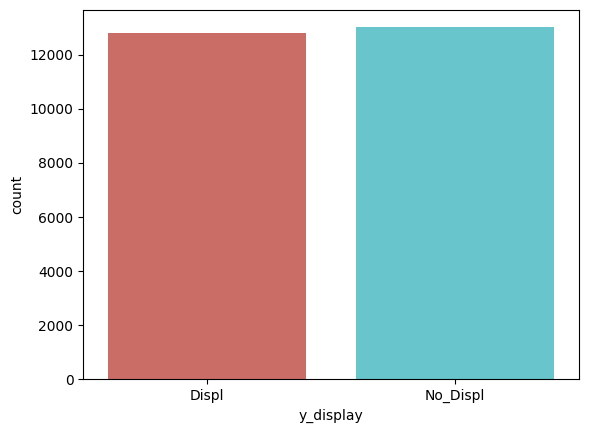

In [12]:
# visualisation
sns.countplot(x='y_display', data=df, palette='hls')
plt.show()

- we don't have an imbalanced dataset.

In [13]:
df["X7_Feature"].value_counts()

X7_Feature
No_Feat    19495
Feat        6287
Name: count, dtype: int64

- since X7_Feature only has two categories: 'No_Feat' and 'Feat', we can use a method like label encoding to convert these categories into 0 and 1. 

In [14]:
# Frequency distribution of 'X5_ENSEIGNE'
enseigne_counts = df['X5_ENSEIGNE'].value_counts()

# Frequency distribution of 'X7_Feature'
feature_counts = df['X7_Feature'].value_counts()

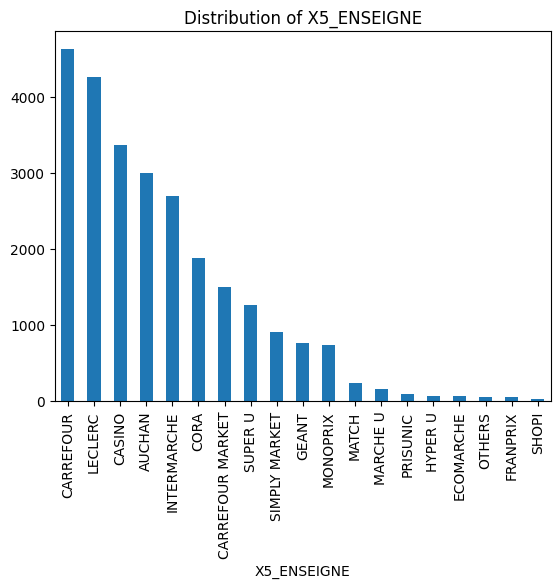

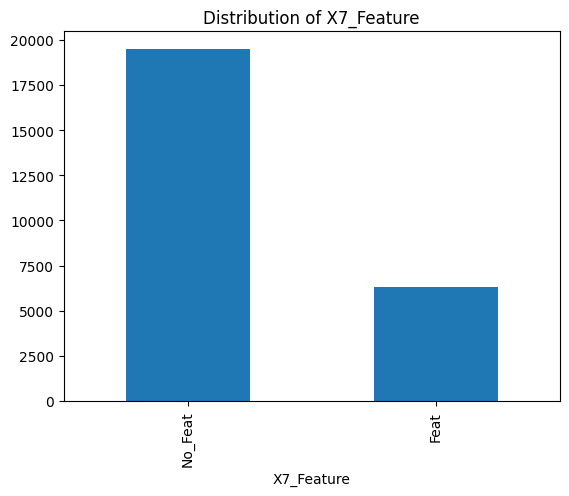

In [15]:
enseigne_counts.plot(kind='bar')
plt.title('Distribution of X5_ENSEIGNE')
plt.show()

feature_counts.plot(kind='bar')
plt.title('Distribution of X7_Feature')
plt.show()

In [16]:
contingency = pd.crosstab(df['y_display'], df['X7_Feature'])
contingency

X7_Feature,Feat,No_Feat
y_display,,
Displ,5912,6870
No_Displ,375,12625


- Of the items that were displayed ('Displ'), 5912 had the 'Feat' feature and 6870 did not have the feature ('No_Feat').
- Of the items that were not displayed ('No_Displ'), 375 had the 'Feat' feature and 12625 did not have the feature.

In [17]:
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 6571.643703811071
P-value: 0.0


- the p-value is 0.0, which is less than the common significance level of 0.05. This means that we can reject the null hypothesis and conclude that there is a statistically significant relationship between 'X7_Feature' and 'y_display'. 

In [18]:
# X5_ENSEIGNE vs y_display
contingency1 = pd.crosstab(df['y_display'], df['X5_ENSEIGNE'])

# df.groupby(['y_display', 'X5_ENSEIGNE']).size().unstack().plot(kind='bar', stacked=True)

chi2, p, dof, expected = chi2_contingency(contingency1)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 783.3518531669146
P-value: 1.1069799512990182e-154


#### Pass to explore the numerical variables

In [20]:
# numerical analysis
numerical_columns = ['X1_cor_sales_in_vol', 'X2_cor_sales_in_val', 'X3_CA_mag', 'X4_value', 'X6_VenteConv']
df[numerical_columns].describe()

,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X6_VenteConv
count,25782.000000,25782.000000,25782.000000,25782.000000,25782.000000
mean,13.767151,130.888312,64641.184431,37.646614,587.855260
std,38.203406,372.649805,54924.645702,23.498949,1821.338396
min,1.000000,1.110000,1693.000000,1.000000,1.000000
25%,2.000000,13.360000,21394.000000,25.000000,50.000000
50%,4.000000,31.050000,51522.000000,32.000000,120.000000
75%,11.000000,87.450000,91000.000000,40.000000,380.000000
max,1475.000000,13589.220000,284844.000000,198.000000,48816.000000


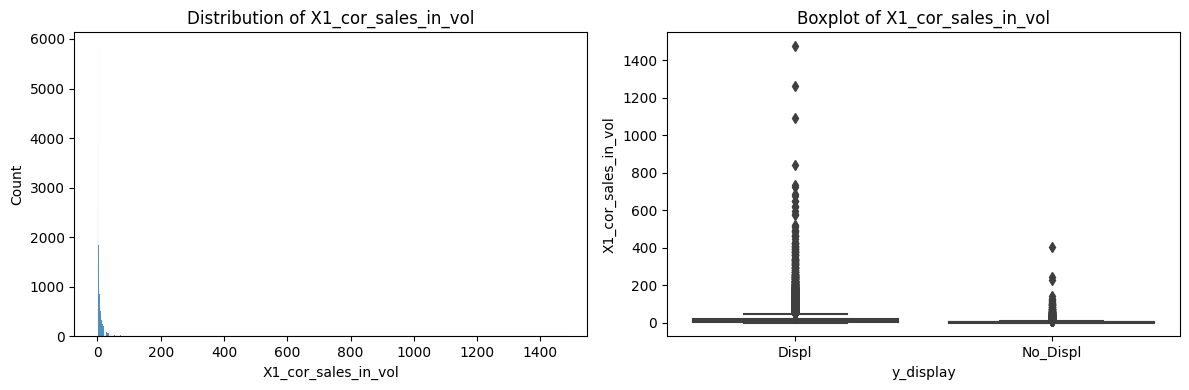

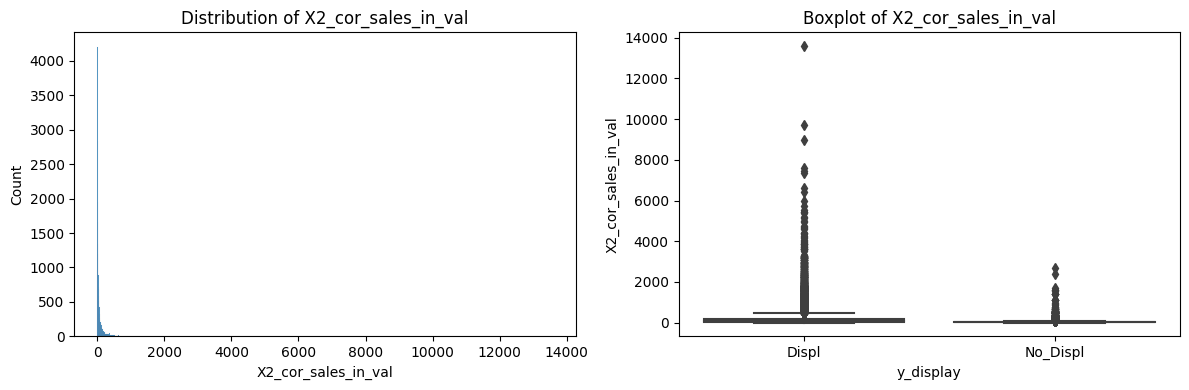

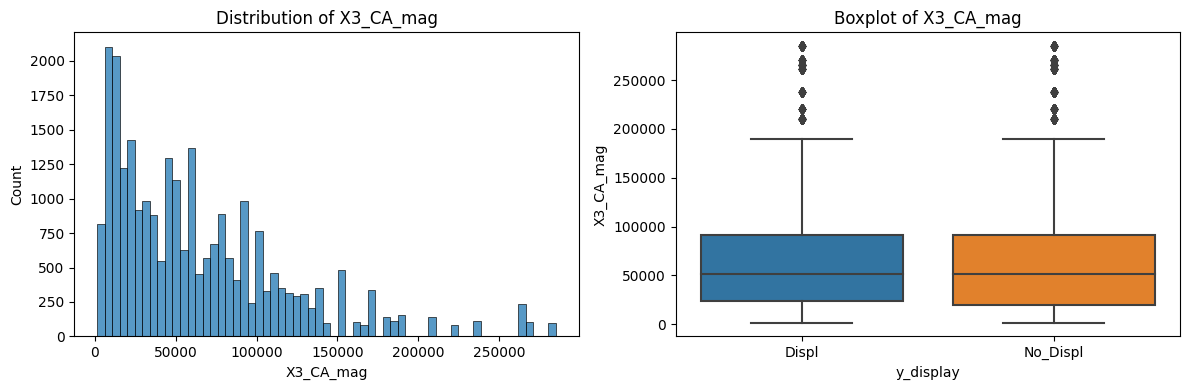

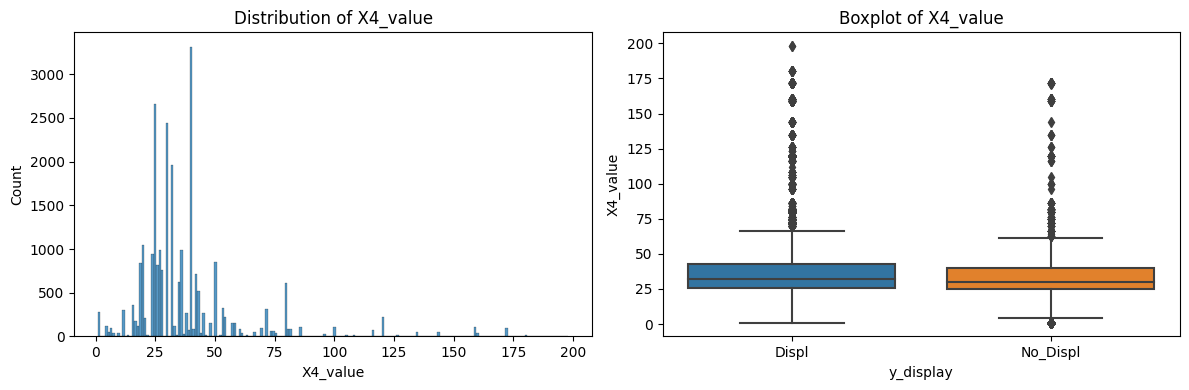

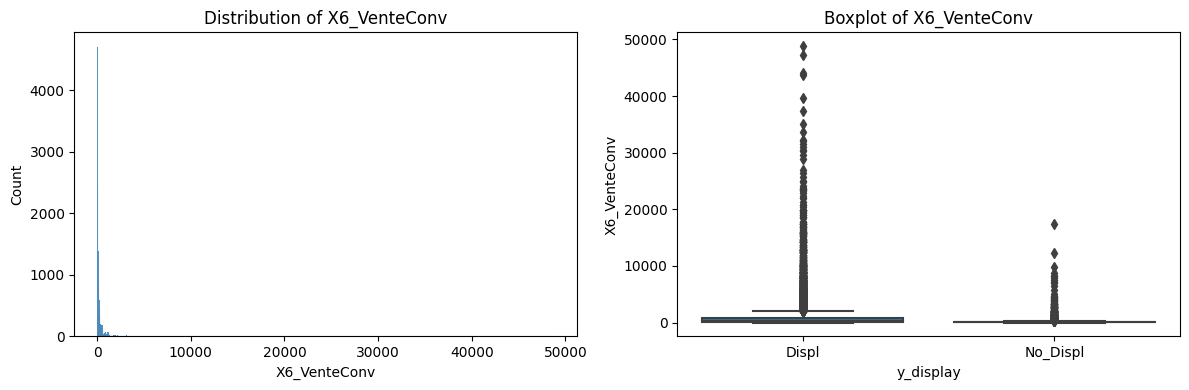

In [21]:
for i in numerical_columns:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create a subplot with 1 row and 2 columns

        # Distribution plot
        sns.histplot(df[i], kde=False, ax=axs[0])  # Distribution on the left (index 0)
        axs[0].set_title(f'Distribution of {i}')

        # Boxplot
        sns.boxplot(x='y_display', y=i, data=df, ax=axs[1])  # Boxplot on the right (index 1)
        axs[1].set_title(f'Boxplot of {i}')

        plt.tight_layout()  # Adjust layout for better visualization
        plt.show()

<Axes: >

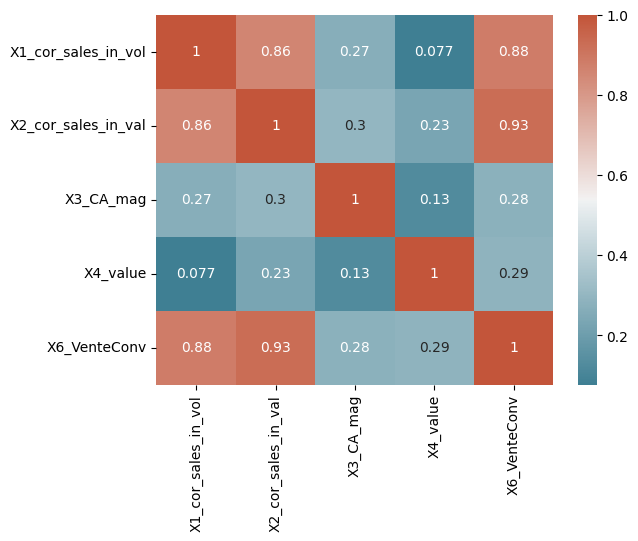

In [22]:
# correlation between numerical features
corr = df[numerical_columns].corr()

# plot the heatmap
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [23]:
corr

,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X6_VenteConv
X1_cor_sales_in_vol,1.000000,0.858353,0.266049,0.077496,0.882588
X2_cor_sales_in_val,0.858353,1.000000,0.297886,0.230587,0.928348
X3_CA_mag,0.266049,0.297886,1.000000,0.127276,0.275925
X4_value,0.077496,0.230587,0.127276,1.000000,0.288883
X6_VenteConv,0.882588,0.928348,0.275925,0.288883,1.000000


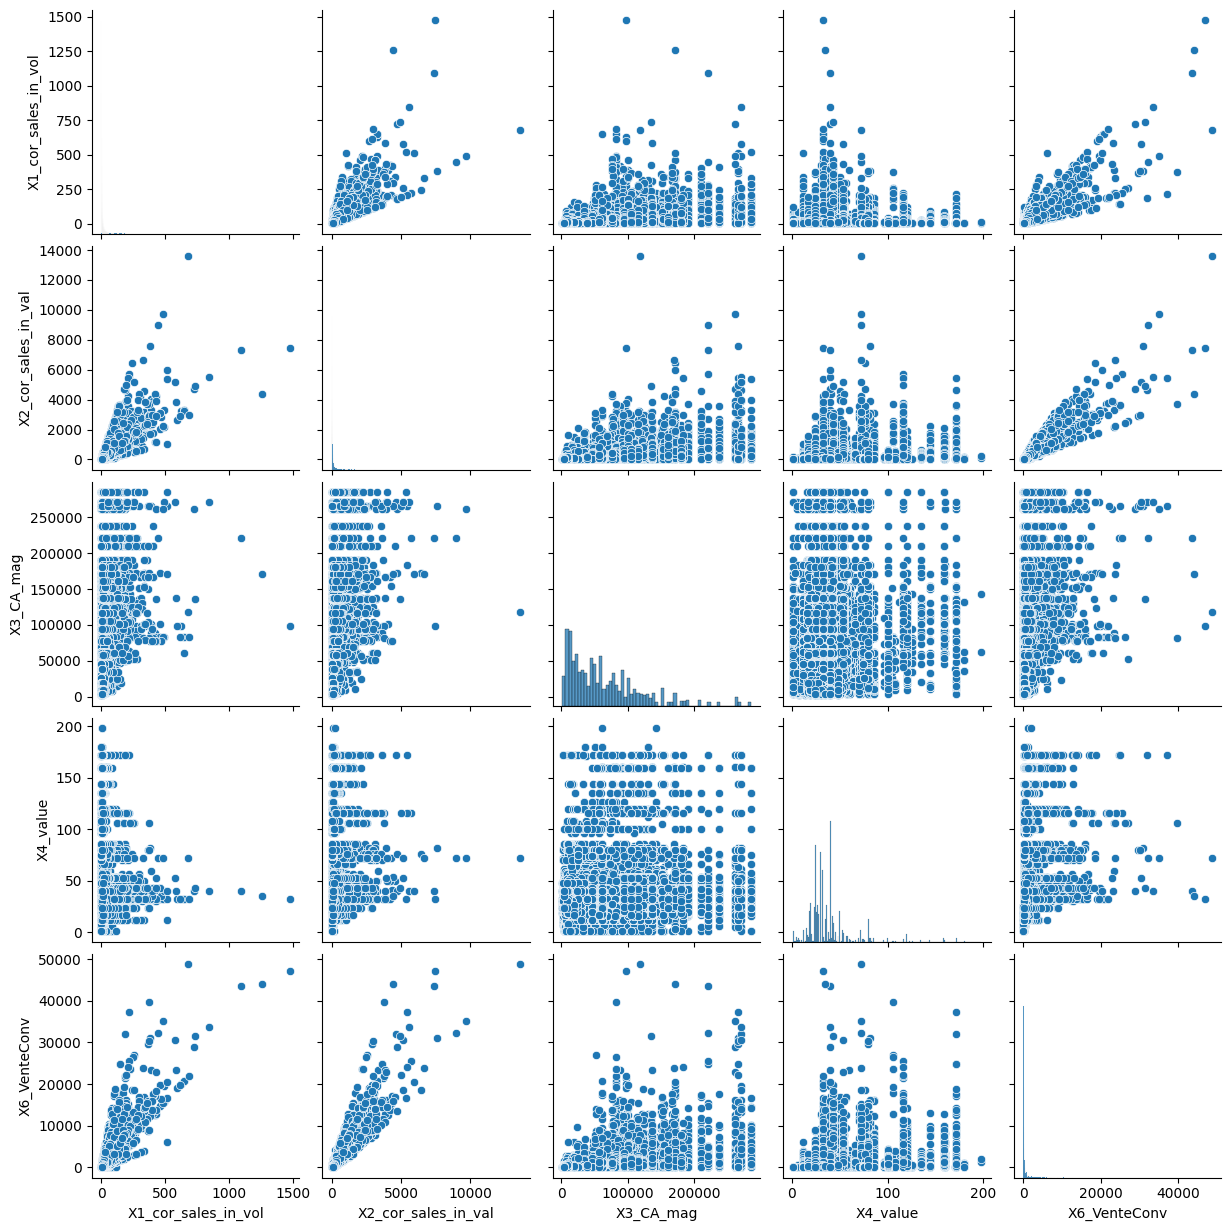

In [14]:
# pairplot between all numerical variables : X1_cor_sales_in_vol, X2_cor_sales_in_val, X3_CA_mag, X4_value, X6_VenteConv
data_subset = df[numerical_columns]

# Creating the pairplot
sns.pairplot(data_subset)
plt.show()